# Evaluating the quality of a models prediction

Thre ways to evaluate Scikit-Learn models/estimators:

1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions


In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, mean_absolute_error, roc_curve, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

heart_disease = pd.read_csv(r"C:\Users\cos_9\PycharmProjects\machine_learning_and_data_science_bootcamp\resources\heart-disease.csv")


X = heart_disease.drop("target", axis=1)
y = heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_random_forest_classifier = RandomForestClassifier()

model_random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

#### Evaluating a model with the score method

In [4]:
print(f"Score on the traing data {model_random_forest_classifier.score(X_train, y_train)}")
print(f"Score on the test data {model_random_forest_classifier.score(X_test, y_test)}")

Score on the traing data 1.0
Score on the test data 0.8524590163934426


#### Lets do the same but for Regression

In [5]:
model_random_forest_regressor = RandomForestRegressor(n_estimators = 100)

model_random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [6]:
print(f"Score on the traing data {model_random_forest_regressor.score(X_train, y_train)}")
print(f"Score on the test data {model_random_forest_regressor.score(X_test, y_test)}")

Score on the traing data 0.9224705249361936
Score on the test data 0.5779299568965518


#### Evaluating a model using the Scoring parameter

Evaluating an ML model using cross validation methods. This essentially changes the way that the test/train data get created, and itterates through the different sets, fits the model, and then estimates the accuracy using the test data. 

In [7]:
model_random_forest_classifier.score(X_test, y_test)

0.8524590163934426

In [8]:
# take the value of single training and test split score

scr = model_random_forest_classifier.score(X_test, y_test)

print(scr)

# take the mean of the test of 5-fold cross prediction.

cvs = cross_val_score(model_random_forest_classifier, X, y, cv=5, scoring=None)
print(cvs)
cvs_mean = np.mean(cvs)

print(cvs_mean)

0.8524590163934426
[0.83606557 0.90163934 0.7704918  0.83333333 0.76666667]
0.8216393442622951


#### Other importan model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

Given a sample of data, how likely is it to estimate the result based on the passed features.

In [9]:
# Accuracy

cvs = cross_val_score(model_random_forest_classifier, X, y, cv=5)

mean_cvs = np.mean(cvs)

In [10]:
print(f"Heart Disease Classifier Cross-Validated Accuracy is: {mean_cvs * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy is: 82.48%


#### Area under Receiver operating charactiristics curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive - model predicts 1 when truth is 1
* False positive - model predicts 1 when truth is 0
* True negative - model predicts 0 when truth is 0
* False negative - model predicts 0 when truth is 1

In [11]:
y_probs = model_random_forest_classifier.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [12]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive, )

print(f"The fpr was: {fpr[:10]}, the tpr was {tpr[:10]}, threshold was {thresholds[:10]}")

The fpr was: [0.         0.         0.         0.         0.         0.03448276
 0.03448276 0.03448276 0.03448276 0.06896552], the tpr was [0.      0.03125 0.09375 0.375   0.4375  0.4375  0.46875 0.59375 0.6875
 0.6875 ], threshold was [2.   1.   0.99 0.83 0.82 0.8  0.78 0.74 0.67 0.66]


In [14]:
def roc_curve_pot(fpr, tpr):
    """Plots ROC curve using false positive rate (fpr) and true positive rate (tpr)"""
  
    plt.plot(fpr, tpr, color="orange", label="ROC Curve")
    plt.plot([0,1], [0,1], color="darkblue", linestyle = "--", label="guessing")
    plt.plot([0,0,1], [0,1,1], color="darkred", linestyle='-.', label="perfect score" )
    plt.xlabel = "False Positive Rate"
    plt.ylabel = "True Positive Rate"
    plt.title ="Receiver Operating Characteristic (ROC) Curve"
    plt.legend()
    plt.show()

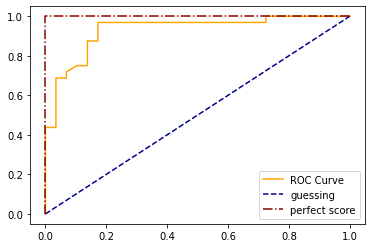

In [15]:
roc_curve_pot(fpr, tpr)

In [16]:
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

## Confusion matrix

A quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 
In essence, giving you an idea of where the model is getting confused.

In [17]:
from sklearn.metrics import confusion_matrix

y_preds = model_random_forest_classifier.predict(X_test)

con_mat = confusion_matrix(y_test, y_preds)

In [18]:
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


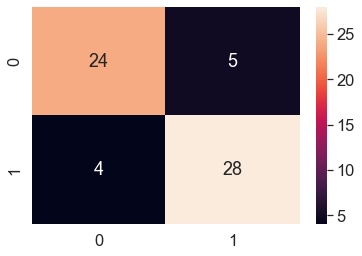

In [19]:
# Make our confusion matrix more visual with Seaborn's heatmap
import seaborn as sns

sns.set(font_scale=1.5)

sns.heatmap(con_mat, annot=True);

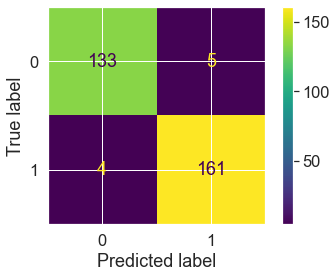

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model_random_forest_classifier, X=X, y=y)

### Classification Report


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - [link](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

The ones we are going to cover are:
1. R2 (r-squared) or coefficient of determination
2. Mean absolute error ( MAE )
3. Mean squared error ( MSE )

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

np.random.seed(42)

housing_df = fetch_california_housing(as_frame=True)["frame"].rename(columns={"MedHouseVal": "target"})

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
model.score(X_test, y_test)

0.8065734772187598

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


y_test_mean = np.full(len(y_test), y_test.mean())

# R2 will be zero if all the predicted values are equal to the mean of our test set
print("Bad model r2 Scrore: ", r2_score(y_test, y_test_mean))

# Perfect R2 score is when the predicted values are equal to the test dataset
print("Perfect model r2 score: ", r2_score(y_test, y_test))

Bad model r2 Scrore:  0.0
Perfect model r2 score:  1.0


#### Mean absolute error (MAE)

The average of the absolute differences between predictions and actual values. It gives us an idea of how wrong your model predictions are.

In [56]:
y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)

print("Mean absolute error is: ", mae)
print("On average each on of the predictions is ", u"\u00B1",round(mae, 3), " from the actual values", sep="")

Mean absolute error is:  0.32659871732073664
On average each on of the predictions is ±0.327 from the actual values


In [63]:
# MAE using formulas rather than the sklearn function
df = pd.DataFrame(data = {"actual": y_test, "pred": y_preds})
df["differences"] = df["actual"] - df["pred"]
np.abs(df["differences"]).mean()

0.32659871732073803

#### Mean squared errors (MSE)

Mean of the square of errors between actual and predicted values

In [64]:
mse = mean_squared_error(y_test, y_preds)

print("Mean squared error is: ", mse)


Mean squared error is:  0.2534678520824551


In [67]:
# Calculating the MSE by hand
df["squared_diff"] = np.square(df["differences"])
df["squared_diff"].mean()

0.25346785208245565

### Machine Learning Model Evaluation
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

#### 1. Classification Model Evaluation Metrics/Techniques

- **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

- **[Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

- **[Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

- **[F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

- **[Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

- **[Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)** - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

- **[Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

- **[ROC Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html)** - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

- **[Area Under Curve (AUC) Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)** - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

###### Which classification metric should you use?

- Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

- Precision and recall become more important when classes are imbalanced.

- If false-positive predictions are worse than false-negatives, aim for higher precision.

- If false-negative predictions are worse than false-positives, aim for higher recall.

- F1-score is a combination of precision and recall.

- A confusion matrix is always a good way to visualize how a classification model is going.

#### 2. Regression Model Evaluation Metrics/Techniques

- **[R^2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) (pronounced r-squared) or the coefficient of determination** - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

- **[Mean absolute error (MAE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

- **[Mean squared error (MSE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

##### Which regression metric should you use?

- R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

- MAE gives a better indication of how far off each of your model's predictions are on average.

- As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
    - Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.
    - Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

- [Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)](https://scikit-learn.org/stable/modules/model_evaluation.html)

- [Beyond Accuracy: Precision and Recall by Will Koehrsen](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

- [Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)](https://stackoverflow.com/a/37861832)



### 4.2.3 Finally using the scoring parameter

In [69]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [71]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [72]:
print(f"The cross-validated accuracy is: {round(np.mean(cv_acc), 2)}")

The cross-validated accuracy is: 0.82


In [76]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
np.mean(cv_acc)

0.8248633879781421

In [78]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.78947368, 0.90625   , 0.82758621, 0.8125    , 0.76315789])

In [81]:
print(f"The cross-validated precision is: {round(np.mean(cv_precision), 2)}")
print(f"The best precision is: {round(np.max(cv_precision), 2)}")

The cross-validated precision is: 0.82
The best precision is: 0.91


In [84]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_recall

array([0.81081081, 0.90625   , 0.86666667, 0.82857143, 0.73684211])

In [85]:
print(f"The cross-validated recall is: {round(np.mean(cv_recall), 2)}")
print(f"The best recall is: {round(np.max(cv_recall), 2)}")

The cross-validated recall is: 0.83
The best recall is: 0.91


##### Doing the same for a regression model

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

np.random.seed(42)

housing_df = fetch_california_housing(as_frame=True)["frame"].rename(columns={"MedHouseVal": "target"})

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

In [89]:
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
cv_r2

array([0.62025478, 0.72620729, 0.61655274])

In [90]:
print(f"The cross-validated r2 is: {round(np.mean(cv_r2), 2)}")

The cross-validated r2 is: 0.65


In [95]:
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
cv_mae

array([-0.52138765, -0.42223996, -0.50635301])

In [98]:
print(f"The cross-validated MAE is: {round(np.mean(cv_mae), 2)}")

The cross-validated MAE is: -0.48


In [97]:
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
cv_mse

array([-0.51713027, -0.33045138, -0.54773343])

In [99]:
print(f"The cross-validated MSE is: {round(np.mean(cv_mse), 2)}")

The cross-validated MSE is: -0.47


### 4.3 Using different evaluation metrics as Sckit Learn functions

The 3rd way to evaluate scikit learn ML models/estimators is to use the [sklearn.metrics ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accuracy: {round(accuracy_score(y_preds, y_test), 2)}")
print(f"Precision: {round(precision_score(y_preds, y_test), 2)}")
print(f"Recall: {round(recall_score(y_preds, y_test), 2)}")
print(f"f1_score: {round(f1_score(y_preds, y_test), 2)}")

Classifier metrics on the test set
Accuracy: 0.8
Precision: 0.89
Recall: 0.74
f1_score: 0.81


In [102]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Classifier metrics on the test set")
print(f"R2: {round(r2_score(y_preds, y_test), 2)}")
print(f"MAE: {round(mean_absolute_error(y_preds, y_test), 2)}")
print(f"MSE: {round(mean_squared_error(y_preds, y_test), 2)}")

Classifier metrics on the test set
R2: 0.73
MAE: 0.33
MSE: 0.27
